# The Simpsons

1.  Lees het bestand van de simpsons in (simpsons_nominal.csv)
Deze tabel bevat informatie over 9 karakters uit de Simpsons.
Deze dataset is al omgezet naar nominale meetwaarden.
We gaan onderzoeken of we 'geslacht' kunnen afleiden uit  haarlengte, gewicht en leeftijd

In [10]:
import numpy as np
import pandas as pd

simpsons_nominal = pd.read_csv('data/simpsons_nominal.csv')
display(simpsons_nominal)

,haarlengte,gewicht,leeftijd,geslacht
0,<3,>160,30-40,M
1,>5,<=160,30-40,V
2,<3,<=160,<30,M
3,>5,<=160,<30,V
4,3-5,<=160,<30,V
5,<3,>160,>40,M
6,>5,<=160,>40,V
7,>5,>160,30-40,M
8,>5,>160,>40,M


2.  Bereken zelf de entropie van deze tabel. Schrijf ook de formule op.

In [2]:
# ======================================================================================================================================================
# S = k_B * ln(W)
# waarbij S de entropie is, k_B de Boltzmannconstante is en W de waarschijnlijkheid is dat het systeem zich in een bepaalde microtoestand bevindt.
# ======================================================================================================================================================
def entropy(series: pd.Series, base=None):
    vc = series.value_counts(normalize=True, sort=False)
    base = 2 if base is None else base
    return -(vc * np.log2(vc)).sum()

E_ouder = simpsons_nominal.apply(entropy)
print(E_ouder)

haarlengte    1.351644
gewicht       0.991076
leeftijd      1.584963
geslacht      0.991076
dtype: float64


3.  Bereken de gain voor iedere kolom.  
Kan je ook de gain van de laatste kolom berekenen?
Schrijf ook telkens de formule op?

In [3]:
# Bereken de gain voor iedere kolom.
def information_gain(parent_table: pd.DataFrame, attribute: str, target: str):
    # bepaal entropie van parent table
    entropy_parent = entropy(parent_table[target])
    child_entropies = []
    child_weights = []

    # bereken entropies of child tables
    for (label, fraction) in parent_table[attribute].value_counts().items():
        child_df = parent_table[parent_table[attribute] == label]
        child_entropies.append(entropy(child_df[target]))
        child_weights.append(int(fraction))

    # calculate the difference between parent entropy and weighted child entropies
    return entropy_parent - np.average(child_entropies, weights=child_weights)


IG_Haarlengte = information_gain(simpsons_nominal, 'haarlengte', 'geslacht')
IG_Gewicht = information_gain(simpsons_nominal, 'gewicht', 'geslacht')
IG_Leeftijd = information_gain(simpsons_nominal, 'leeftijd', 'geslacht')

print("Initiële Information Gain voor alle kolommen")
print("Haarlengte:\t", IG_Haarlengte)
print("Gewicht:\t", IG_Gewicht)
print("Leeftijd:\t", IG_Leeftijd)

# Kan je ook de gain van de laatste kolom berekenen?
# (laatste kolom) = geslacht (JA)

# Schrijf ook telkens de formule op?
# Information Gain = Entropy(parent) - Weighted average of Entropy(children)

Initiële Information Gain voor alle kolommen
Haarlengte:	 0.45165906291896185
Gewicht:	 0.5900048960119099
Leeftijd:	 0.07278022578373267


4.  Bepaal de subtabel waarbij het gewicht altijd <=160 is.

In [4]:
# Deze vraag is over complex. Hieronder de normale vraag:
# (Geef me alle rijen waar het gewicht gelijk is aan '<=160')
simpsons_li = simpsons_nominal.loc[simpsons_nominal.gewicht == '<=160']
display(simpsons_li)

,haarlengte,gewicht,leeftijd,geslacht
1,>5,<=160,30-40,V
2,<3,<=160,<30,M
3,>5,<=160,<30,V
4,3-5,<=160,<30,V
6,>5,<=160,>40,V


5.  Wat is de entropie van deze subtabel?
En hoe verhoudt zich dat tov. entropie van de originele tabel?

In [5]:
def entropy(series: pd.Series, base=None):
    vc = series.value_counts(normalize=True, sort=False)
    base = 2 if base is None else base
    return -(vc * np.log2(vc)).sum()

# Wat is de entropie van deze subtabel?
print("Oorspronkelijke entropie:")
entropie_simpsons_nominal = entropy(simpsons_nominal.geslacht)
print(entropie_simpsons_nominal)

print("Entropie van de nieuwe sub tabel, gebaseerd op het gewicht:")
entropie_simpsons_gewicht = entropy(simpsons_li.geslacht)
print(entropie_simpsons_gewicht)

# En hoe verhoudt zich dat tov. entropie van de originele tabel?
verschil_entropie = entropie_simpsons_nominal - entropie_simpsons_gewicht
print("Het verschil tussen de twee tabellen:")
print(verschil_entropie)

Oorspronkelijke entropie:
0.9910760598382222
Entropie van de nieuwe sub tabel, gebaseerd op het gewicht:
0.7219280948873623
Het verschil tussen de twee tabellen:
0.2691479649508599


6.  Bepaal de gain voor iedere kolom van deze subtabel.  
Welke kolom kies je dus voor de volgende stap?

In [6]:
def information_gain(parent_table: pd.DataFrame, attribute: str, target: str):
    # bepaal entropie van parent table
    entropy_parent = entropy(parent_table[target])
    child_entropies = []
    child_weights = []

    # bereken entropies of child tables
    for (label, fraction) in parent_table[attribute].value_counts().items():
        child_df = parent_table[parent_table[attribute] == label]
        child_entropies.append(entropy(child_df[target]))
        child_weights.append(int(fraction))

    # calculate the difference between parent entropy and weighted child entropies
    return entropy_parent - np.average(child_entropies, weights=child_weights)

IG_Haarlengte = information_gain(simpsons_li, 'haarlengte', 'geslacht')
IG_Gewicht = information_gain(simpsons_li, 'gewicht', 'geslacht')
IG_Leeftijd = information_gain(simpsons_li, 'leeftijd', 'geslacht')

print("Initiële Information Gain voor alle kolommen")
print("Haarlengte:\t", IG_Haarlengte)
print("Gewicht:\t", IG_Gewicht)
print("Leeftijd:\t", IG_Leeftijd)

# Welke kolom kies je dus voor de volgende stap?
# We kiezen "Haarlengte" want Het is het hoogste getal van de 3 (geslacht tellen we niet mee)


Initiële Information Gain voor alle kolommen
Haarlengte:	 0.7219280948873623
Gewicht:	 0.0
Leeftijd:	 0.17095059445466854


7.  Maak de boomstructuur in Python

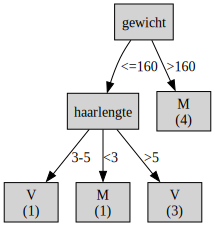

In [7]:
from id3 import Id3Estimator, export_graphviz
import graphviz

X = simpsons_nominal.drop(columns=['geslacht'], axis=1)
y = simpsons_nominal['geslacht']

model = Id3Estimator()

# Bouw het model
model.fit(X, y)

# maak model
model_tree = export_graphviz(model.tree_, feature_names=X.columns)
# toon beslissingsboom
graphviz.Source(model_tree.dot_tree)

8. Welk geslacht verwacht je voor een gloednieuw Simpson karakter met volgende eigenschappen?
 * haarlengte = '>5'
 * gewicht = '>160'
 * leeftijd = '30-40'

In [8]:
eigenschappen = np.array([['>5', '>160', '30-40']])
print(model.predict(eigenschappen)) # "M"

['M']


9. Extra : Probeer nu eens een DecisionTree op te stellen met DecisionTreeClassifier uit scikit-learn.tree

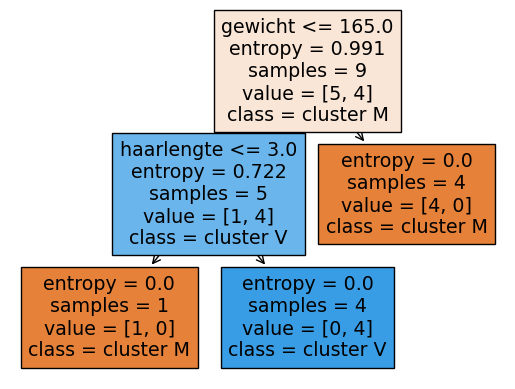

In [9]:
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

simpsons = pd.read_csv("data/simpsons.csv")
classifier = DecisionTreeClassifier(criterion='entropy')
classifier.fit(simpsons.drop(['geslacht', 'naam'], axis=1), simpsons['geslacht'])

tree.plot_tree(classifier, feature_names=simpsons.drop(['geslacht', 'naam'], axis=1).columns.values, class_names=['cluster {}'.format(i) for i in np.unique(simpsons['geslacht'])], filled=True)
plt.show()

# Deze dataset (simpsons_nominal.csv) was niet bruikbaar, Omdat de gegevens als nominale waarde er in stonden. Daarvoor hebben we een andere dataset gebruikt (simpsons.csv).